### 목표 설정
- 버섯의 특징을 활용해 독/식용 버섯 분류
- 의사결정나무 시각화 & 과대적합 속성을 제어(하이퍼 파라미터 설정)
- 특성선택 해보기

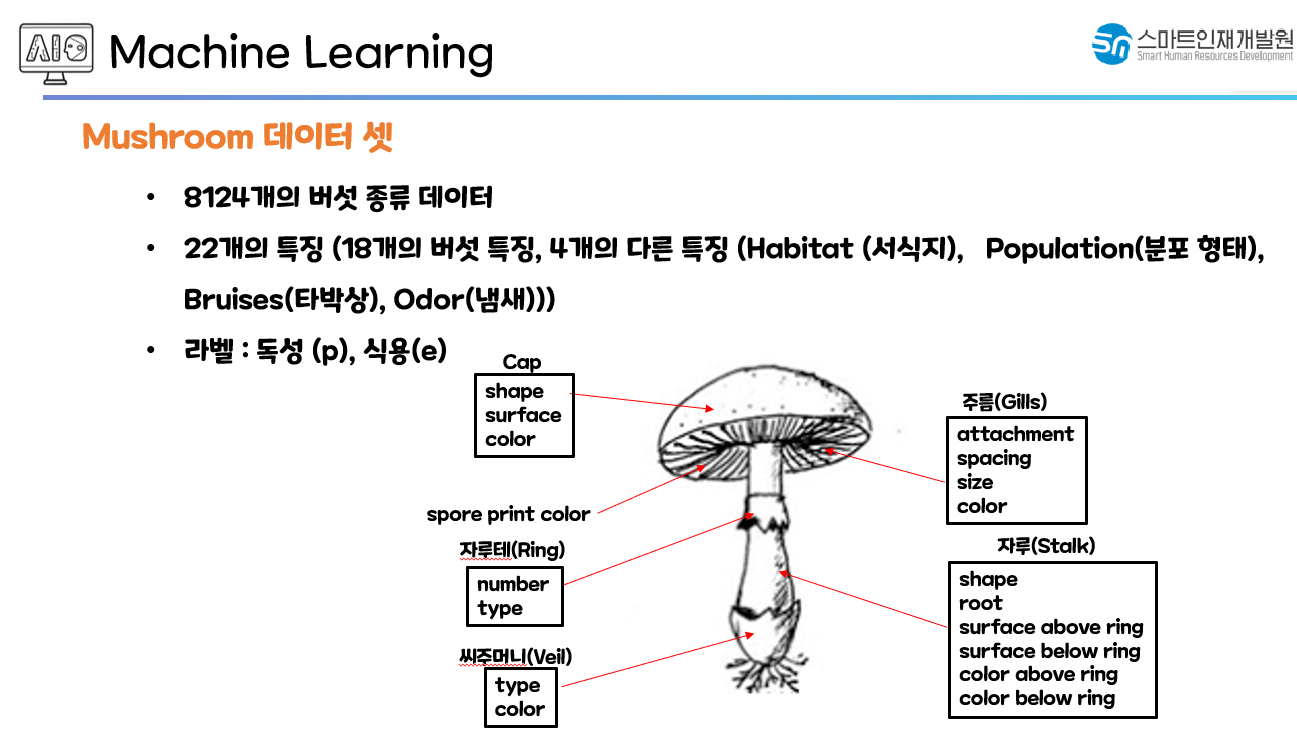

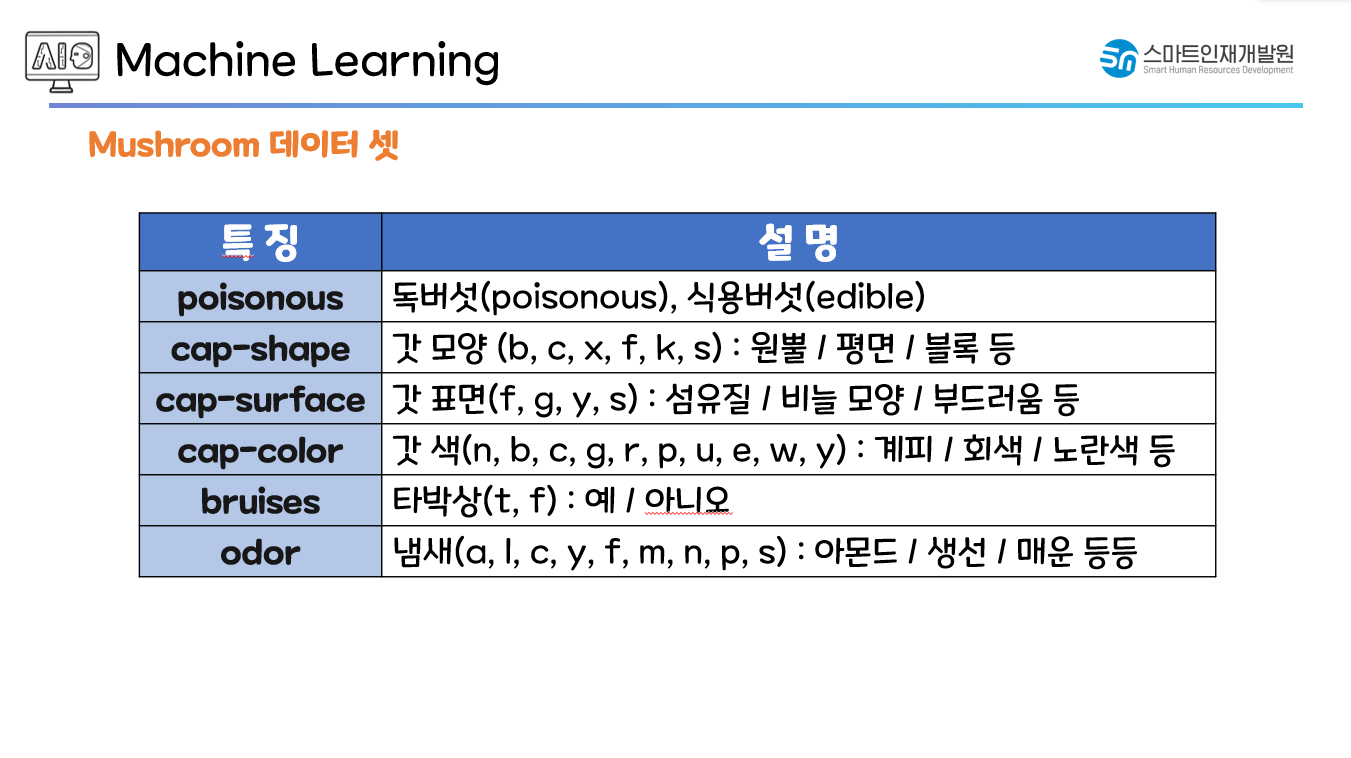

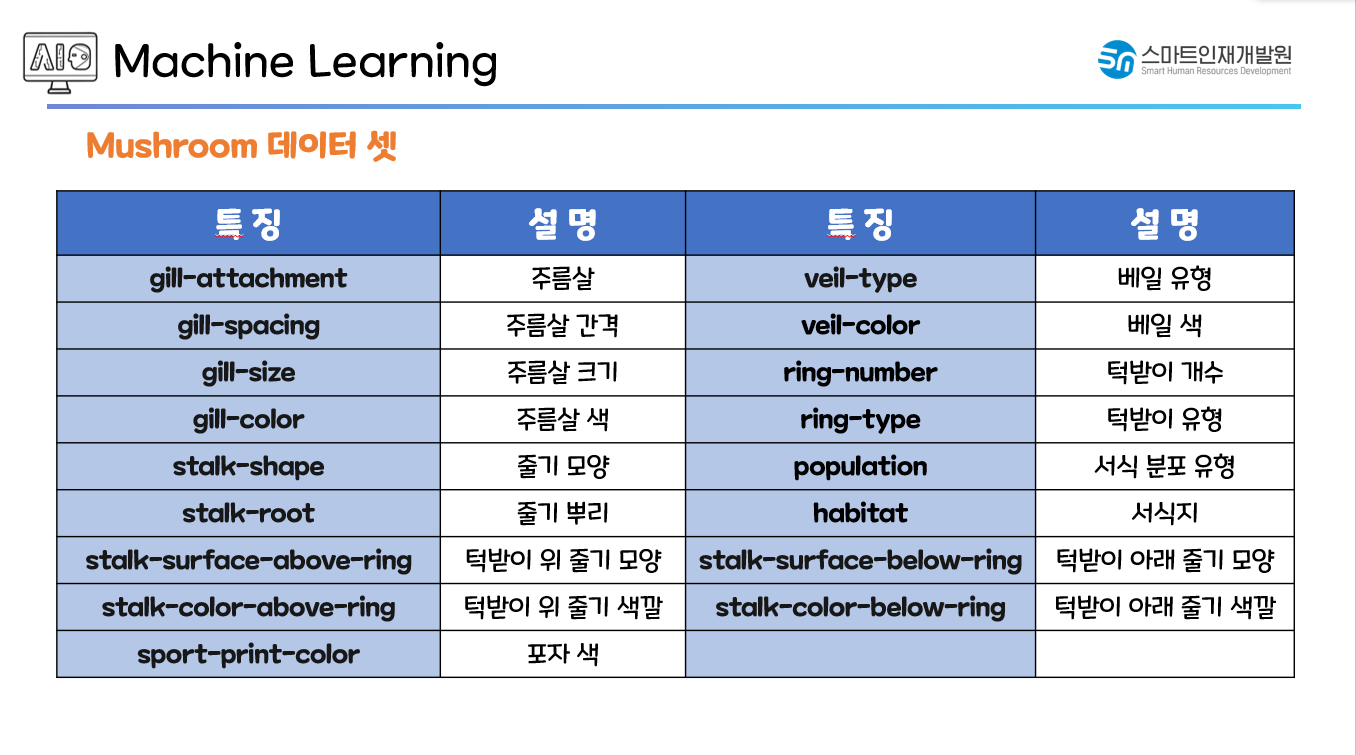

In [1]:
# 필요한 라이브러리 불러오기
# 1. pandas 
import pandas as pd

# 2. train_test_split
from sklearn.model_selection import train_test_split

In [3]:
# 데이터 셋 불러오기
data = pd.read_csv('./data/mushroom.csv')

In [4]:
# 데이터 확인해보기
data.head(1)

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u


In [5]:
# 전체 컬럼 표시하기
pd.set_option('display.max_columns', None)

In [6]:
data.head(1)

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u


In [7]:
# 결측치 유무 확인하기 - info()
# info() - 데이터프레임에 대한 간략한 정보를 제공하는 함수
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poisonous                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

###  문제와 정답 분리

In [11]:
# label : 'poisonous'

X = data.loc[:,'cap-shape':]
y = data['poisonous']

In [12]:
print(X.shape)
print(y.shape)

(8124, 22)
(8124,)


In [13]:
# 정답의 분포 확인 (독버섯은 몇개? 식용버섯은 몇개?)
y.value_counts()

e    4208
p    3916
Name: poisonous, dtype: int64

### one-hot encoding(원 핫 인코딩)

In [15]:
X_one_hot = pd.get_dummies(X)

In [16]:
X_one_hot.head(1)

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_f,bruises_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_a,gill-attachment_f,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,gill-color_b,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-shape_e,stalk-shape_t,stalk-root_?,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_r,stalk-surface-above-ring_f,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_f,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_b,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_b,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-type_p,veil-color_n,veil-color_o,veil-color_w,veil-color_y,ring-number_n,ring-number_o,ring-number_t,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


- 원 핫 인코딩 : 값의 크고 작음이 의미가 없을 때 수치화 시켜주는 방법
- 라벨 인코딩보다 상대적으로 많이 사용
- 분류하고자 하는 범주*(종류)만큼 자릿수를 만들고 단 한개의 1과 나머지 0으로 채워서 숫자화 하는 방법

### 추가설명) label encoding

In [17]:
# unique() : 데이터의 고유값을 확인하는 함수
X['habitat'].unique()

array(['u', 'g', 'm', 'd', 'p', 'w', 'l'], dtype=object)

In [18]:
# 데이터 딕셔너리화
habitat_dic = {
    'u': 1, 
    'g': 2, 
    'm': 3, 
    'd': 4, 
    'p': 5, 
    'w': 6, 
    'l': 7
}
X['habitat'].map(habitat_dic)

0       1
1       2
2       3
3       1
4       2
       ..
8119    7
8120    7
8121    7
8122    7
8123    7
Name: habitat, Length: 8124, dtype: int64

- 라벨인코딩보다 원핫인코딩을 더 많이 사용하는 이유
    - 숫자는 기본적으로 크기라는 개념을 가지고 있다.
    - 크기라는 개념이 모델학습에 영향을 줄 수 있다. 그래서 크기라는 개념이 없는 원 핫 인코딩을 더 많이 사용하는 편이다.
    - 주의, 엄청 중요) 회귀에서는 라벨 인코딩 사용을 하지 않는다.


###  데이터 분할(훈련셋 / 정답셋)
- train_test_split을 이용해서 데이터 셋을 분할해보자!

In [22]:
# train_test_split 사용하기(평가셋은 30%, 랜덤 시드값은 7)
X_train, X_test, y_train, y_test = train_test_split (X_one_hot, y, test_size=0.3, random_state=7)

In [23]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5686, 117)
(2438, 117)
(5686,)
(2438,)


In [24]:
# 모델 불러오기
from sklearn.tree import DecisionTreeClassifier

In [25]:
# 모델 객체 생성
tree = DecisionTreeClassifier() # 소괄호 꼭 넣어주기

In [26]:
tree.fit(X_train, y_train)

DecisionTreeClassifier()

###  의사결정나무 모델 시각화

In [27]:
# graphviz 설치 방법
# anaconda prompt -> pip install graphviz, condat install graphviz 설치
# 파이썬 루트폴더 찾아가서 anaconda3 들어가기
# anaconda3 -> Library -> include -> graphviz 폴더 복사하기
# 다시 anaconda3으로 돌아와서 Lib -> site-package 폴더 안에 붙여 넣어주기!

In [28]:
import graphviz

In [29]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file = 'tree.dot', 
                class_names=['독', '식용'], 
                feature_names=X_one_hot.columns, 
                impurity= False, # 지니 불순도 표시 유무
                filled=True # 트리내부에 색상을 채워줄 것인가?
               )

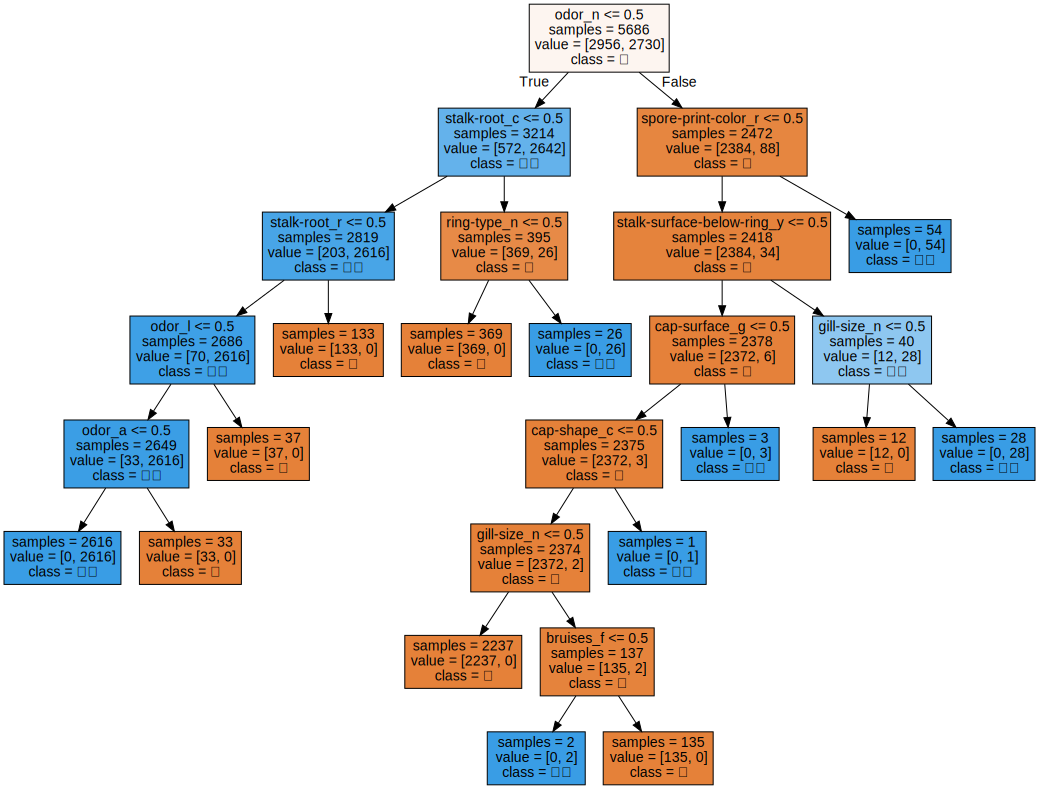

In [30]:
# 파일 불러와서 시각화 작업하기
with open('tree.dot', encoding = 'UTF8') as f : 
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

### 평가
- 교차 검증을 언제 사용하느냐? 평가 단계에서 train score 대신 확인할 수 있음
- 앞으로는 평가단계에서  
  cross_val_score(tree,X_one_hot, y, cv=5)로 확인

In [31]:
# tree 모델 평가하기
tree.score(X_train, y_train)

1.0

In [32]:
tree.score(X_test, y_test)

1.0

### 하이퍼 파라미터 조정(트리의 복잡도를 제어)
- 의사결정나무는 기본모델을 사용할 시 모든 값을 완벽하게 분할하려는 특성을 가지고 있다.
- 위의 특성때문에 과대적합에 약한 모습을 보인다. (과대적합이 자주 일어난다.)
- 그래서 트리의 하이퍼 파라미터를 조정해서 트리가 복잡해지지 않도록 적절한 값을 넣어줘야 한다.

In [46]:
# max_dapth : 트리의 깊이 조절
tree2 = DecisionTreeClassifier(max_depth=4)
tree2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

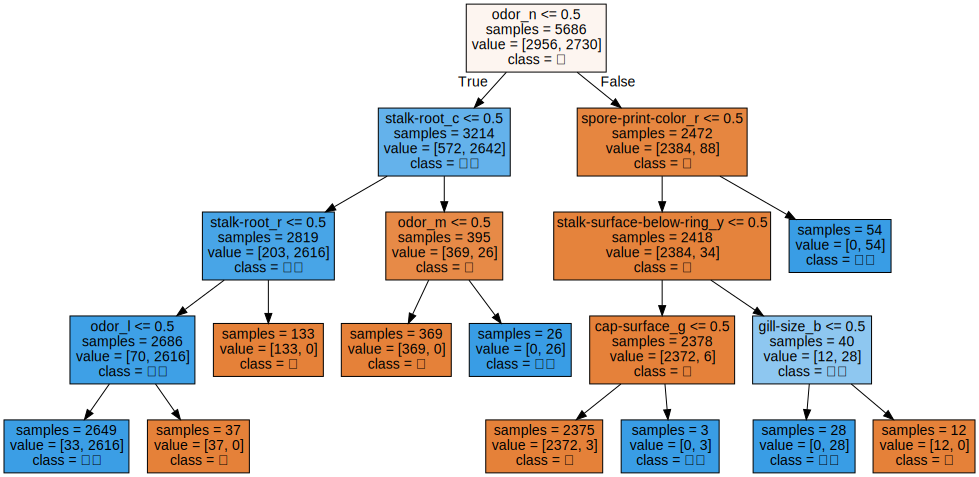

In [47]:
export_graphviz(tree2, out_file = 'tree2.dot', 
                class_names=['독', '식용'], 
                feature_names=X_one_hot.columns, 
                impurity= False, # 지니 불순도 표시 유무
                filled=True # 트리내부에 색상을 채워줄 것인가?
               )

# 파일 불러와서 시각화 작업하기
with open('tree2.dot', encoding = 'UTF8') as f : 
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

In [48]:
cross_val_score(tree2,X_one_hot, y, cv=5)

array([1.        , 0.99446154, 0.98830769, 1.        , 0.97105911])

In [50]:
# min_samples_split : 노드로 분할 가능한 최소 샘플 수
tree2 = DecisionTreeClassifier(min_samples_split=2500)
tree2.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=2500)

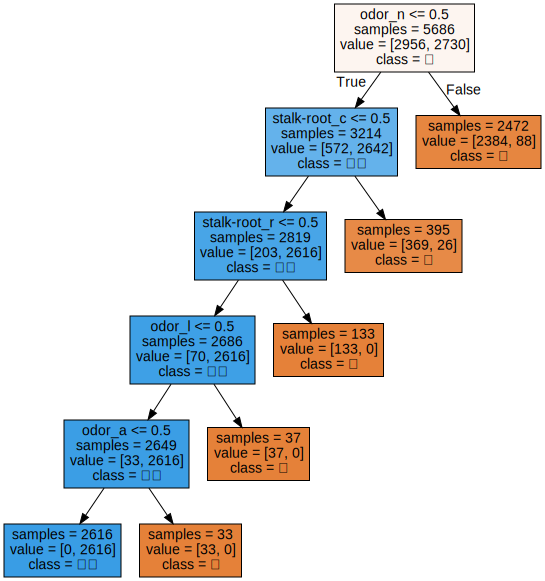

In [52]:
export_graphviz(tree2, out_file = 'tree2.dot', 
                class_names=['독', '식용'], 
                feature_names=X_one_hot.columns, 
                impurity= False, # 지니 불순도 표시 유무
                filled=True # 트리내부에 색상을 채워줄 것인가?
               )

# 파일 불러와서 시각화 작업하기
with open('tree2.dot', encoding = 'UTF8') as f : 
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

In [53]:
cross_val_score(tree2,X_one_hot, y, cv=5)

array([1.        , 0.99938462, 0.83753846, 0.99876923, 0.62561576])

🔸 원래의 흐름 
- 모델 만들기 → 학습 → 평가   
      ✔ 하이퍼 파라미터를 변화해 가면서 여러번 사용하는 데이터는 고정되어있는 train, test 데이터 사용  
      ✔ 고정되어 있는 데이터를 사용하면 새로운 데이터에 대한 예측이 힘들어짐  
      ✔ 여러번 사용했기 때문에 test에서도 과대적합이 걸릴 수 있음  
<br>  
  
🔹 바뀐 흐름  
- 모델 만들기 → 학습 → 평가   
      ✔ 하이퍼 파라미터를 변화해 가면서 여러번 사용하는 데이터가 고정되어 있는 train과   
        고정되어 있지 않은 validation(검증)
      ✔ validation score가 높게 나온다면 고정되어 있지 않은 
        test(모델의 입장에서 보면 완전히 새로운 데이터)를 사용
<br>  
          
🔸 훈련 데이터 : 검증 데이터 : 평가 데이터 = 5 : 3 : 2  
   - 검증 데이터의 필요성
         ✔ 기존의 방식(학습 : 평가 = 7 : 3)은 test가 여러번 사용됨
         ✔ 모델의 입장 : test 데이터는 새로운 데이터가 아님.(test 데이터의 과대적합)
         ✔ 검증데이터(30%) 세트를 제작(테스트 역할)
         ✔ 검증데이터 세트에서 좋은 score가 나왔으면 마지막으로 test 데이터로 확인
            ⇒ 모델이 잘 만들어졌는지를 제대로 확인
   - 검증 데이터를 만드는 방법(교차검증)
         ✔ 검증을 하는 기초적인 방법
         ✔ 검증 Data를 하나로 고정하지 않고, Test 데이터의 모든 부분을 사용   
         ✔ 학습-평가 데이터 나누기를 여러 번 반복하여 
           - 모델의 안정성을 높이고
           - 과대 적합을 감소시키는 통계적 기법

### 교차검증
- 훈련과 평가를 여러번 진행하면서 검증의 효과를 얻기 위한 방법
- 전체 데이터가 축소되지 않기 때문에 적은 데이터에서도 효과를 얻을 수 있음

In [44]:
# 교차 검증을 위한 라이브러리 불러오기
from sklearn.model_selection import cross_val_score
# 사용할 모델 : 문제 데이터, 정답 데이터, 데이터 분할 수 (cv)
# 데이터를 훈련과 평가로 나누어주기 때문에 문제와 정답으로 분리한 데이터 사용
# cv = 5 : 학습, 결과가 5번 출력
cross_val_score(tree,X_one_hot, y, cv=5)

array([1.        , 1.        , 0.99630769, 1.        , 0.98522167])

In [45]:
# 검증을 확인할 필요가 있음.
# 보통은 mean() 함수를 사용
cross_val_score(tree,X_one_hot, y, cv=5).mean()
# 기존 완벽한 1이 아닌 교차 검증을 해보니 0.996정도가 나왔다 확인

0.9963058734369079

### 특성 선택
- tree 모델이 판별한 특성 중요도 확인
- 데이터가 많아지게 되면 데이터를 줄여야 함.
    - 1. 학습량이 늘어나서 시간이 많이 소요됨
    - 2. 쓸데없는 데이터가 발생 (독성인지 식용인지 도움이 안되는 데이터)  
         ==> 불필요한 계산이나 시간 소요
- 목적 : 쓸모있는 데이터만 남기자

In [40]:
fi = tree.feature_importances_
fi

array([0.        , 0.00070311, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00210579, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00138862, 0.        , 0.02296199, 0.        , 0.        ,
       0.02507431, 0.        , 0.60890188, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00593799, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.18145449, 0.        ,
       0.08469657, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01348388, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [41]:
# 데이터 프레임화 시키기
importance_df = pd.DataFrame(fi, index =X_one_hot.columns)
importance_df.sort_values(by = 0, ascending= False) # 내림차순
# 0의 이름을 갖는 컬럼을 기준으로 내림차순으로 정렬
# 전체 특성이 117 컬럼

,0
odor_n,0.608902
stalk-root_c,0.181454
stalk-root_r,0.084697
spore-print-color_r,0.036178
odor_l,0.025074
...,...
gill-color_e,0.000000
gill-color_b,0.000000
gill-size_b,0.000000
gill-spacing_w,0.000000


In [56]:
# 중요도가 0인 것을 제외하고 확인
importance_df[importance_df[0] !=0]

,0
cap-shape_c,0.000703
cap-surface_g,0.002106
bruises_f,0.001389
odor_a,0.022962
odor_l,0.025074
odor_n,0.608902
gill-size_n,0.005938
stalk-root_c,0.181454
stalk-root_r,0.084697
stalk-surface-below-ring_y,0.013484


- tree 모델 내부에서 시각화 표를 확인했을 때 가장 중요도가 높은 odor_n 컬럼을 우선 고려해서 분류한 것을 확인
- 중요도가 가장 높은 컬럼(정답을 분류해내는데 가장 많은 영향을 주는 중요한) 을 먼저 고려해야 가장 효율적으로 분류할 수 있기 때문
- 현재 버섯데이터는 odor_n 컬럼이 60% 이상읜 중요도를 혼자 차지하고 있다. -> 모델이 학습하기 쉬운 데이터  
 -> 100 % 정확도를 쉽게 얻어낼 수 있음. -> 실전 데이터는 더 어렵다!